In [10]:
!pip install seaborn

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

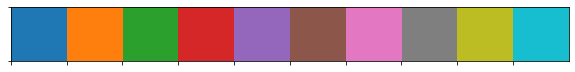

In [16]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

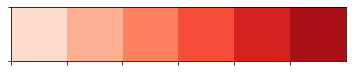

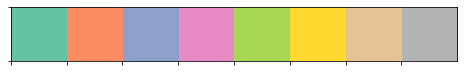

In [19]:
sns.palplot(sns.color_palette("Reds"))
sns.palplot(sns.color_palette("Set2"))



In [22]:
tips = sns.load_dataset("tips")
tips.info()
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips['day'].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [28]:
pd.pivot_table(tips, index=['day'], values=["tip"])
pd.pivot_table(tips, index=['smoker'], values=["tip"])
pd.pivot_table(tips, index=['sex'], values=["tip"])
pd.pivot_table(tips, index=['time'], values=["tip"])
pd.pivot_table(tips, index=['time'], values=["total_bill"])
tips.groupby("time")["total_bill"].mean() # time에 대해 groupby, total_bill의 평균
tips.groupby('size')['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [31]:
tips[["tip", "size"]].corr() # 인과관계인지는 모르겠지만, 한 쪽이 증가하면 다른 쪽이 증가하는 것은 맞다.

,tip,size
tip,1.000000,0.489299
size,0.489299,1.000000


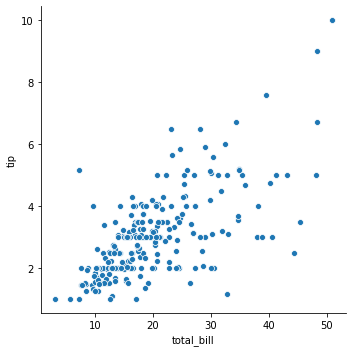

In [34]:
sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()

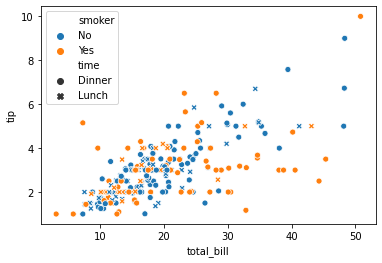

In [37]:
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips) # hue = 색상, 모양 time
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
plt.show()

In [ ]:
# sns.relplot(x="total_bill", y="tip", hue="size", data=tips) # size로 색상 다르게 연결
sns.relplot(x="total_bill", y="tip", size="size", data=tips) # size 마다 차이 -> 가독성 조금 더 좋다
plt.show()

In [32]:
fmri = sns.load_dataset("fmri")
fmri.info()
fmri.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


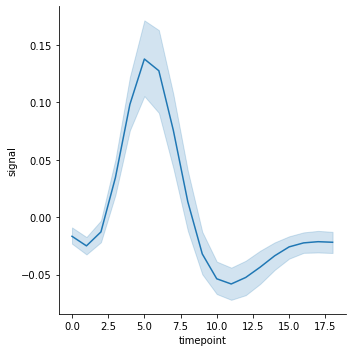

In [35]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri) # line plot
plt.show()

In [38]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", row="event", height=3, kind="line", estimator=None, data=fmri) # estimator = 밀도 추정(추정치 범위) 없앰
plt.show()

In [ ]:
fmri.query("region == 'frontal'") # query = 조건
# fmri[fmri['region'] == 'frontal'] -> 위와 같은 방식

In [ ]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", col="subject",col_wrap=5, height=3, linewidth=2.5, kind="line", data=fmri.query("region == 'frontal'")) # col wrap 은 컬럼이 10개라도 지정값 주면 5개만 주는것 . 1 x 10 -> 1 * 5 / 1 * 5 2개로 줌
plt.show()

In [ ]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips) # kind="swarm" : easing overplotting # jitter=True-> 데이터 찍는 것이 정확한 게 아니라 흔들려서 찍어서 밀집도가 정확하게 보일수 있다.
plt.show()

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()

In [ ]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

In [ ]:
exercise = sns.load_dataset("exercise")


In [ ]:
exercise.iloc[:,1:].head()

In [ ]:
sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)
plt.show()

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
crime_in_seoul = pd.read_csv('data-files/b.normed-crime-in-seoul.csv', encoding='utf-8',index_col='구별')

In [43]:
crime_in_seoul.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,0.777283,0.857143,0.769231,0.428571,0.864846,570500.0,2780,4.857843,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,0.788462,1.000000,0.750000,0.333474,0.828909,453233.0,773,1.286607,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,0.823529,0.928571,1.000000,0.430962,0.886372,330192.0,748,1.641616,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,0.729008,1.000000,1.000000,0.601145,0.847521,603772.0,884,2.333944,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,0.690625,1.000000,0.888889,0.305617,0.801092,525515.0,1496,2.860342,3.686223


In [44]:
plt.rc('font', family='NanumGothic')

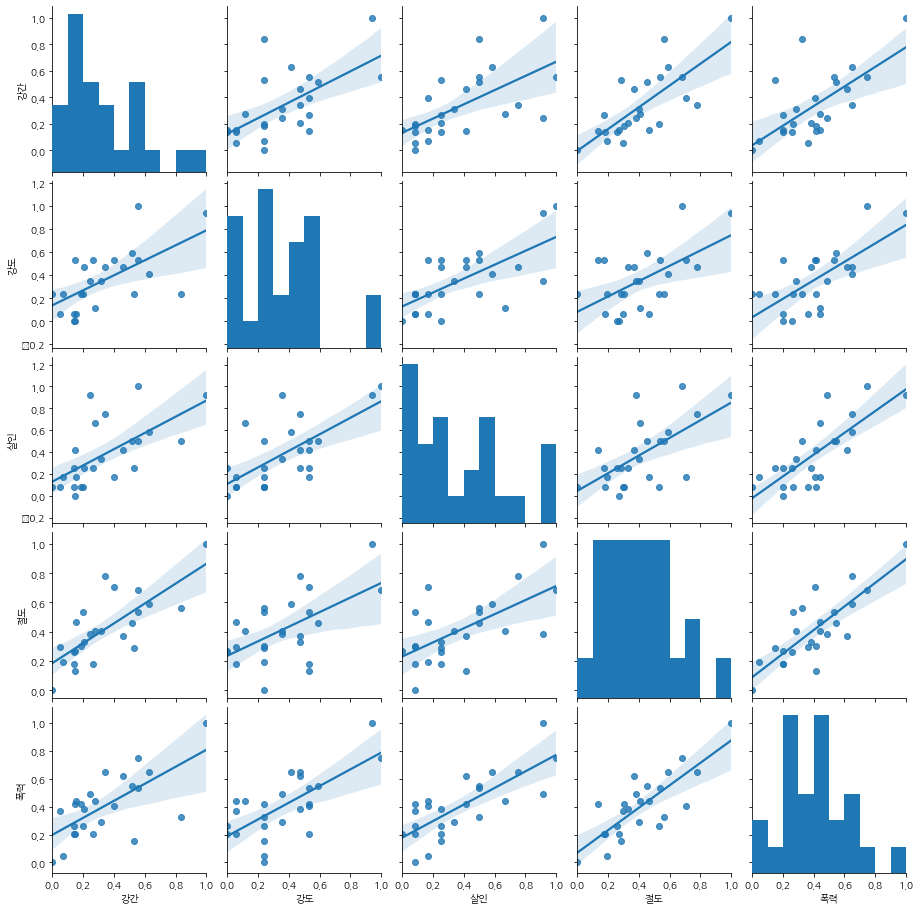

In [45]:
sns.pairplot(crime_in_seoul.iloc[:, :5], kind='reg') # reg를 넣으면 회귀선을 그려줌, 추정치의 오차도 나옴(배경 색)
plt.show() # 히스토그램은 자기와의 관계

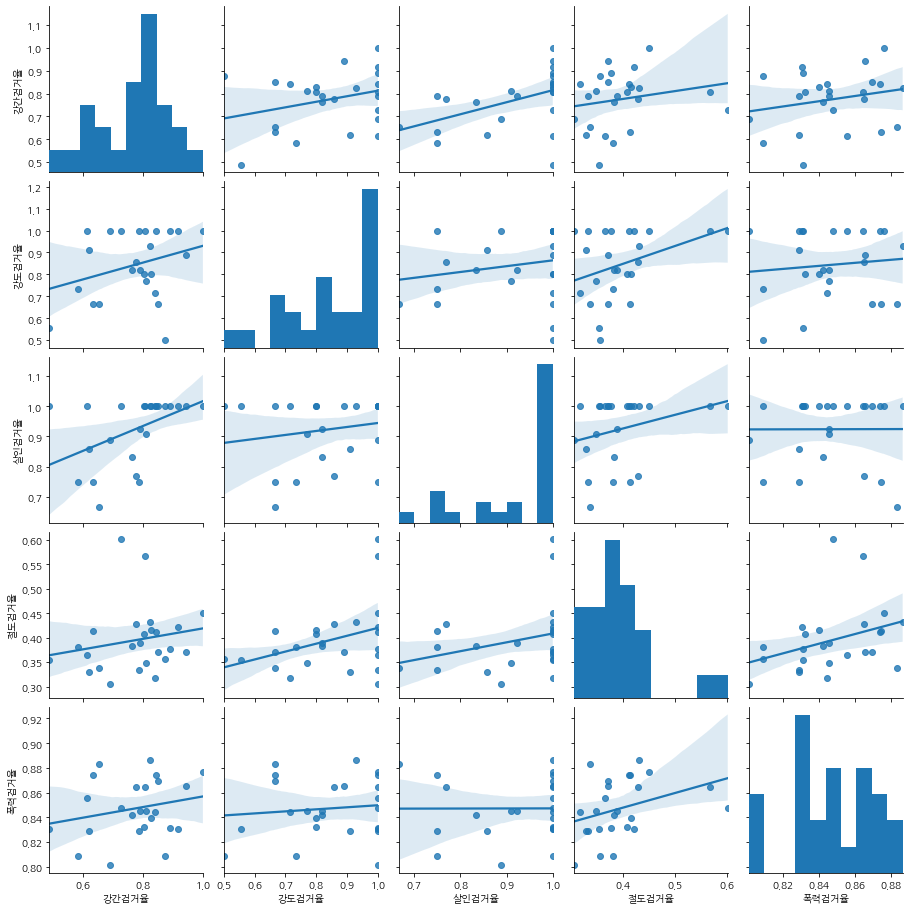

In [46]:
sns.pairplot(crime_in_seoul.iloc[:, 5:10], kind='reg')
plt.show()

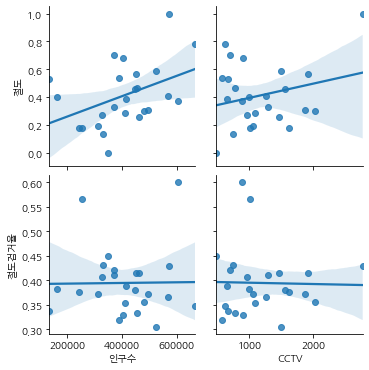

In [47]:
sns.pairplot(crime_in_seoul, x_vars=['인구수', 'CCTV'], y_vars=['절도','절도검거율'], kind='reg')
plt.show()

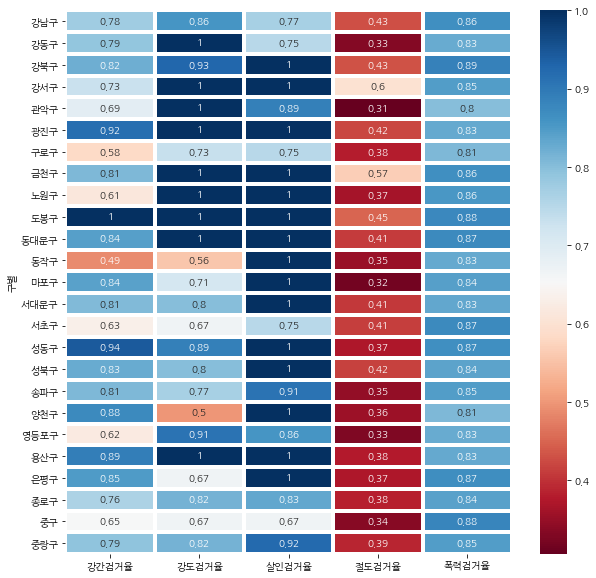

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_in_seoul.iloc[:,5:10],annot=True,cmap='RdBu',linewidths=3) # annot은 값을나타냄 # cmap은 색깔 변경  , linewidths는 사이 떼는 것
plt.show()

In [49]:
lat_lng = [[37.5636465, 126.9895796],
 [37.5755578, 126.9848674],
 [37.5547584, 126.9734981],
 [37.5647848, 126.9667762],
 [37.5718529, 126.9989143],
 [37.5387099, 126.9659183],
 [37.5897482, 127.0161353],
 [37.58506149999999, 127.0457679],
 [37.550814, 126.954028],
 [37.5153176, 126.905728],
 [37.5617309, 127.0363806],
 [37.5130866, 126.9428498],
 [37.542873, 127.083821],
 [37.591836, 126.9053648],
 [37.63730390000001, 127.0273399],
 [37.4568722, 126.8970429],
 [37.5990885, 127.0956516],
 [37.5094352, 127.0669578],
 [37.4743789, 126.9509748],
 [37.5516732, 126.8499269],
 [37.528511, 127.1268224],
 [37.6020592, 127.0321577],
 [37.494931, 126.886731],
 [37.4956054, 127.0052504],
 [37.5165667, 126.8656763],
 [37.5019065, 127.1271513],
 [37.6425238, 127.0717076],
 [37.4945959, 126.9831279],
 [37.6283597, 126.9287226],
 [37.6533589, 127.052682],
 [37.49349, 127.0772119]]

In [50]:
# !pip install folium

In [51]:
import folium

In [52]:
my_map = folium.Map(location=[37.562456, 126.839829], zoom_start=23)
my_map

In [53]:
my_map = folium.Map(location=[37.562456, 126.839829], zoom_start=10, tiles='Stamen Terrain')
my_map

In [60]:
crime_in_seoul = pd.read_csv('data-files/b.normed-crime-in-seoul.csv', encoding='utf-8', index_col='구별')

In [55]:
import json

In [56]:
with open('data-files/b.geo-simple.json',encoding='utf-8') as f:
    geo_simple = json.load(f)

geo_simple

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [61]:
my_map = folium.Map(location=[37.561146, 126.974577], tiles="Stamen Toner", zoom_start=11)

my_map.choropleth(geo_data=geo_simple, data=crime_in_seoul["살인"], fill_color = "PuRd", key_on='feature.id')

my_map

In [65]:
my_map = folium.Map(location=[37.561146, 126.974577], zoom_start =11)
for lat, lng in lat_lng:
    folium.Marker([lat, lng]).add_to(my_map)

my_map

In [68]:
cis = pd.read_csv('data-files/b.crime-in-seoul.csv', encoding='utf-8', thousands=",")
cis['범죄'] = cis.iloc[:, 1:10:2].sum(axis=1)
cis.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,범죄
0,중부서,2,2,3,2,105,65,1395,477,1355,"1,170",2860
1,종로서,3,3,6,5,115,98,1070,413,1278,"1,070",2472
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094
3,서대문서,2,2,5,4,154,124,1812,738,2056,"1,711",4029
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233


In [73]:
my_map = folium.Map(location=[37.561146, 126.974577], zoom_start=11)

for idx, loc in enumerate(lat_lng):
    folium.CircleMarker(loc, radius=float(cis.iloc[idx, -1])/100, color='red', fill_color="red", fill=True).add_to(my_map) # radius는 원의 반지름 크기 # 100 나누는 것은 원 넘 커서

my_map